In [38]:
import pandas as pd

df = pd.read_csv(r'../Datasets/kidney_disease_test.csv')
rename_dict = {
    'id': 'patient_id',
    'age': 'age',
    'bp': 'blood_pressure',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cells',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'hemoglobin',
    'pcv': 'packed_cell_volume',
    'wc': 'white_cell_count',
    'rc': 'red_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anemia'
}
# cols_to_keep =['id', 'age', 'bp'] + [col for col in cols]
# df = df[cols_to_keep]

df = df.rename(columns=rename_dict)

columns_to_drop = ['bacteria','blood_urea', 'appetite', 'anemia', 'serum_creatinine', 'specific_gravity','pus_cells', 'packed_cell_volume','pus_cell_clumps', 'white_cell_count', 'blood_glucose_random', 'sodium', 'potassium', 'hypertension', 'pedal_edema']

df = df.drop(columns=columns_to_drop)
df = df.set_index('patient_id')
df['red_blood_cells'] = df['red_blood_cells'].map({'abnormal': 0, 'normal': 1})
df['diabetes_mellitus'] = df['diabetes_mellitus'].map({'no': 0, 'yes': 1})
df['coronary_artery_disease'] = df['coronary_artery_disease'].map({'no': 0, 'yes': 1})
df = df.dropna()
df

,age,blood_pressure,albumin,sugar,red_blood_cells,hemoglobin,red_cell_count,diabetes_mellitus,coronary_artery_disease
patient_id,,,,,,,,,
210,59.0,100.0,4.0,2.0,1.0,7.3,3.9,1.0,1.0
93,73.0,100.0,3.0,2.0,0.0,9.2,3.2,1.0,1.0
84,59.0,70.0,3.0,0.0,1.0,7.1,2.1,0.0,0.0
329,33.0,60.0,0.0,0.0,1.0,14.1,5.1,0.0,0.0
266,55.0,80.0,0.0,0.0,1.0,13.2,5.3,0.0,0.0
9,53.0,90.0,2.0,0.0,0.0,9.5,3.7,1.0,0.0
361,29.0,80.0,0.0,0.0,1.0,13.7,5.8,0.0,0.0
56,76.0,70.0,3.0,4.0,1.0,10.2,3.4,1.0,1.0
278,48.0,60.0,0.0,0.0,1.0,14.5,6.4,0.0,0.0


<Axes: xlabel='age', ylabel='sugar'>

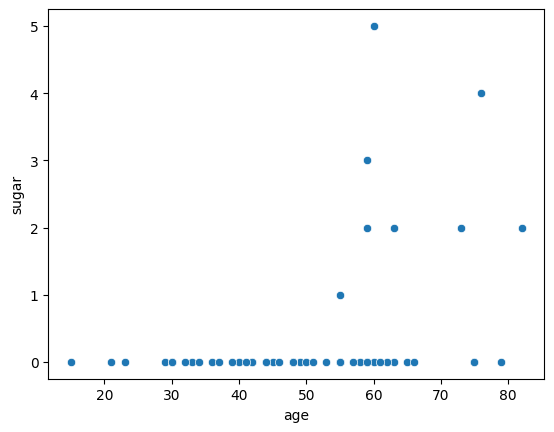

In [40]:
import seaborn as sns

sns.scatterplot(data=df, x=df['age'], y=df['sugar'])

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['diabetes_mellitus', 'coronary_artery_disease']), df['coronary_artery_disease'], test_size=0.2, random_state=0)


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled

,age,blood_pressure,albumin,sugar,red_blood_cells,hemoglobin,red_cell_count
0,0.901133,-0.630548,-0.665169,-0.381342,0.434959,0.938834,0.335072
1,1.687577,-1.471278,-0.665169,-0.381342,0.434959,0.239764,1.014033
2,-0.278532,-0.630548,0.696108,-0.381342,0.434959,-1.126601,-1.022851
3,0.049153,0.210183,-0.665169,-0.381342,0.434959,0.176212,-0.149901
4,-2.244641,0.210183,-0.665169,-0.381342,0.434959,1.002386,0.432066
5,-0.475143,-0.630548,-0.665169,-0.381342,0.434959,0.970610,0.529061
6,1.753114,-0.630548,1.376746,3.347337,0.434959,-1.063049,-1.313834
7,0.704522,1.050913,1.376746,4.279507,-2.299068,-0.649962,-0.246895
8,2.146335,0.210183,0.696108,1.482998,0.434959,-0.173323,-0.537878
9,1.687577,-0.630548,-0.665169,-0.381342,0.434959,0.017332,0.044088


In [66]:
import numpy as np

# np.round(X_train.describe(), 1)
np.round(X_train_scaled.describe(), 1)

,age,blood_pressure,albumin,sugar,red_blood_cells,hemoglobin,red_cell_count
count,44.0,44.0,44.0,44.0,44.0,44.0,44.0
mean,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.2,-1.5,-0.7,-0.4,-2.3,-2.6,-2.2
25%,-0.6,-0.6,-0.7,-0.4,0.4,-0.8,-0.8
50%,-0.1,0.2,-0.7,-0.4,0.4,0.2,0.0
75%,0.7,0.2,0.7,-0.4,0.4,0.9,0.6
max,2.1,2.7,2.1,4.3,0.4,1.4,1.7


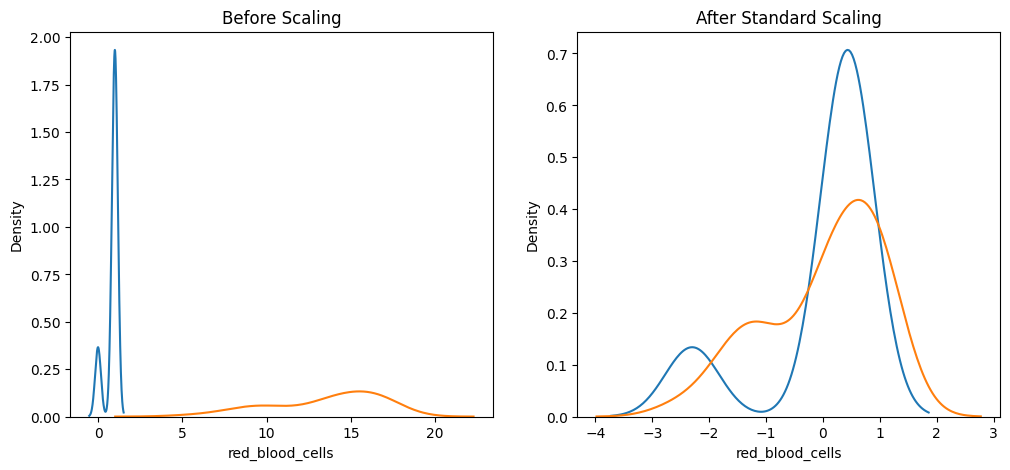

In [67]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train ['red_blood_cells'], ax=ax1)
sns.kdeplot(X_train['hemoglobin'], ax=ax1)
#after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['red_blood_cells'], ax=ax2)
sns.kdeplot(X_train_scaled['hemoglobin'], ax=ax2)
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

c:\Users\Muhammad Awais Raza\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [69]:
y_predict = lr.predict(X_test)
y_predict_scaled = lr_scaled.predict(X_test_scaled)

In [70]:
from sklearn.metrics import accuracy_score


print('Actual predictions: ', accuracy_score(y_test,y_pred=y_predict))
print('Scaled predictions: ', accuracy_score(y_test, y_pred=y_predict_scaled))

Actual predictions:  0.9090909090909091
Scaled predictions:  0.9090909090909091
